# Customer Segmentation

In [1]:
# Connecting to Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import datetime as dt
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Copying Data
data = pd.read_csv('/content/drive/MyDrive/capstone_project/data_files/merge_data.csv')

In [4]:
# Columns
data.columns

Index(['reviewTime', 'reviewerID', 'asin', 'reviewerName', 'helpful',
       'help_per', 'reviewText', 'overall', 'sentiment', 'summary',
       'unixReviewTime', 'reviewTime.1', 'description', 'title', 'imUrl',
       'related', 'salesRank', 'categories', 'price', 'brand'],
      dtype='object')

In [5]:
# Columns
data.shape

(2982326, 20)

In [6]:
# Summary
data.describe()

,help_per,overall,unixReviewTime,price
count,2.982326e+06,2.982326e+06,2.982326e+06,2.667854e+06
mean,3.307806e+01,4.107974e+00,1.358166e+09,2.929901e+01
std,4.361229e+01,1.336448e+00,5.000698e+07,4.011675e+01
min,0.000000e+00,1.000000e+00,9.014112e+08,1.000000e-02
25%,0.000000e+00,4.000000e+00,1.347667e+09,1.013000e+01
50%,0.000000e+00,5.000000e+00,1.372810e+09,1.884000e+01
75%,8.750000e+01,5.000000e+00,1.391472e+09,3.321000e+01
max,2.000000e+02,5.000000e+00,1.406074e+09,9.999900e+02


In [10]:
# Converting Date Format
data['reviewTime'] = pd.to_datetime(data['reviewTime'])

In [11]:
# Creating Date
end_date = dt.datetime(2015, 12, 1)

In [12]:
# Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2982326 entries, 0 to 2982325
Data columns (total 20 columns):
 #   Column          Dtype         
---  ------          -----         
 0   reviewTime      datetime64[ns]
 1   reviewerID      object        
 2   asin            object        
 3   reviewerName    object        
 4   helpful         object        
 5   help_per        float64       
 6   reviewText      object        
 7   overall         int64         
 8   sentiment       object        
 9   summary         object        
 10  unixReviewTime  int64         
 11  reviewTime.1    object        
 12  description     object        
 13  title           object        
 14  imUrl           object        
 15  related         object        
 16  salesRank       object        
 17  categories      object        
 18  price           float64       
 19  brand           object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(15)
memory usage: 455.1+ MB


In [13]:
# Grouping the Data for RFM
data_2 = data.groupby('reviewerID').agg({'reviewTime': lambda reviewTime: (end_date - reviewTime.max()).days,'asin' : 'nunique', 'price' : 'sum'})

In [14]:
# Shape of Data
data_2.shape

(1851132, 3)

In [15]:
# Assigning Columns
data_2.columns = ['recency','frequency','monetary']

In [16]:
# Data Head
data_2.head()

,recency,frequency,monetary
reviewerID,,,
A0000726154QG4JYYPS1W,628,1,22.95
A000096617D1KX8J1SNO6,774,1,73.78
A000152835L65OOF6JM10,771,1,18.58
A000187635I595IAVSQLH,638,2,11.22
A00024081MYZENMKQF9NC,516,1,6.99


In [17]:
# Scaling of Data
std = StandardScaler()

scaled_df = std.fit_transform(data_2)

In [18]:
# Creating DataFrame for Scaled Data

scaled_df = pd.DataFrame(scaled_df,columns=['recency','frequency','monetary'], index=data_2.index)

In [19]:
# Data Head
scaled_df.head()

,recency,frequency,monetary
reviewerID,,,
A0000726154QG4JYYPS1W,-0.681653,-0.258189,-0.272911
A000096617D1KX8J1SNO6,-0.431311,-0.258189,0.446752
A000152835L65OOF6JM10,-0.436455,-0.258189,-0.334782
A000187635I595IAVSQLH,-0.664506,0.164322,-0.438987
A00024081MYZENMKQF9NC,-0.873697,-0.258189,-0.498876


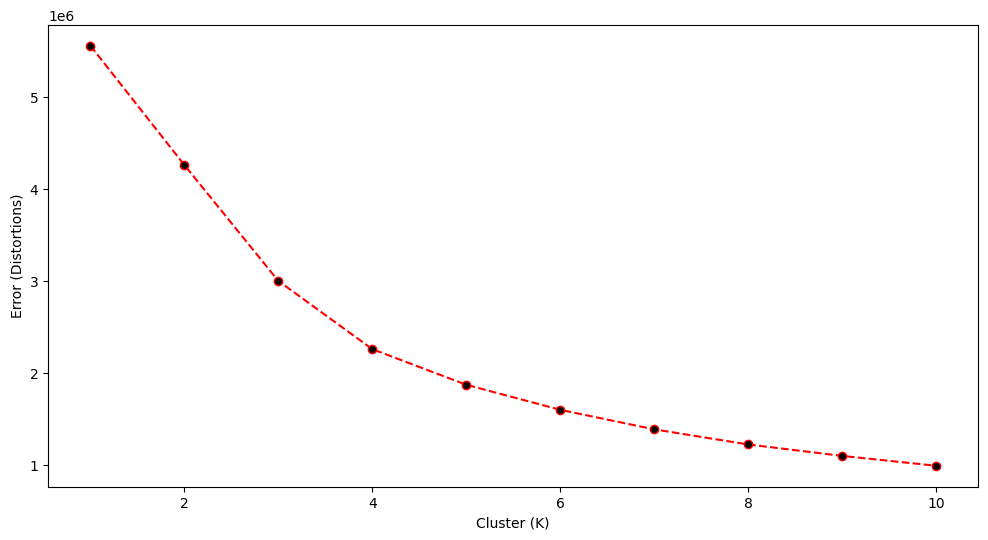

In [20]:
# Elbow Method for Finding Best Cluster

error = []
for i in range(1,11):
    km = KMeans(n_clusters=i,random_state=10)
    km.fit_predict(scaled_df)
    error.append(km.inertia_)

plt.figure(figsize=(12,6))
plt.plot(range(1,11),error,marker='o',ls='--',color='red',mfc='black')
plt.xlabel('Cluster (K)')
plt.ylabel('Error (Distortions)')
plt.show()

In [21]:
# Model Building
model_1 = KMeans(n_clusters=4,random_state=22)

In [22]:
# Fitting Data
model_1.fit(scaled_df)

KMeans(n_clusters=4, random_state=22)

In [23]:
# Centroids
centroids = model_1.cluster_centers_
centroids_df = pd.DataFrame(centroids,columns=list(scaled_df))
centroids_df

,recency,frequency,monetary
0,-0.404032,1.547385,2.392711
1,-0.330126,-0.106037,-0.166799
2,-0.783408,17.847422,13.191699
3,2.017810,-0.201537,-0.177650


In [24]:
# Cluster Labels
label_df = pd.DataFrame(model_1.labels_,columns=['labels'])
label_df.head()

,labels
0,1
1,1
2,1
3,1
4,1


In [25]:
# Adding Labels to Data Frame
scaled_df['labels'] = label_df['labels'].values

In [26]:
# Data Head
scaled_df.head()

,recency,frequency,monetary,labels
reviewerID,,,,
A0000726154QG4JYYPS1W,-0.681653,-0.258189,-0.272911,1
A000096617D1KX8J1SNO6,-0.431311,-0.258189,0.446752,1
A000152835L65OOF6JM10,-0.436455,-0.258189,-0.334782,1
A000187635I595IAVSQLH,-0.664506,0.164322,-0.438987,1
A00024081MYZENMKQF9NC,-0.873697,-0.258189,-0.498876,1


In [27]:
# Replacing Names of Clusters
scaled_df['labels'] = scaled_df['labels'].replace({0:'Promising',1:'Need-Attention',2:'Best-Customer',3:'Churn-Out'})

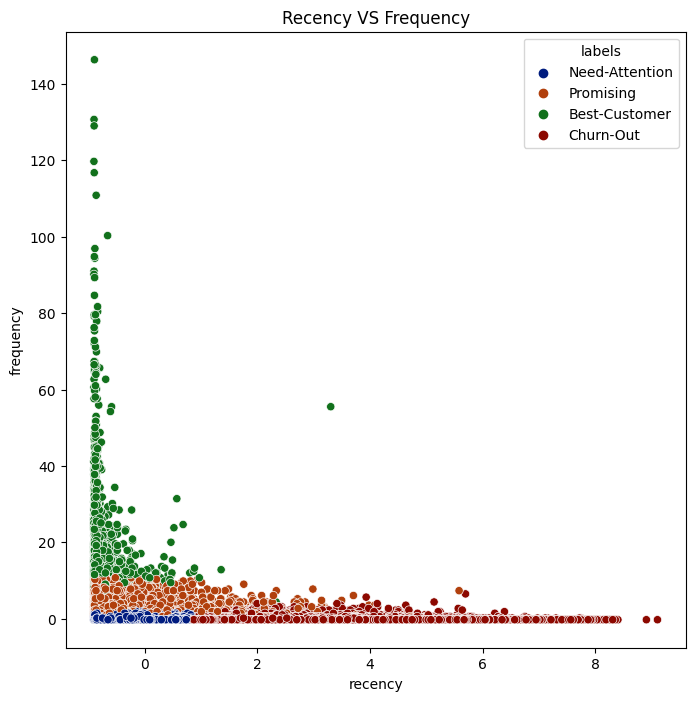

In [28]:
# Recency VS Frequency
plt.figure(figsize=(8,8))
sb.scatterplot(x ='recency',y = 'frequency',data = scaled_df, hue='labels', palette='dark')
plt.title('Recency VS Frequency')
plt.show()

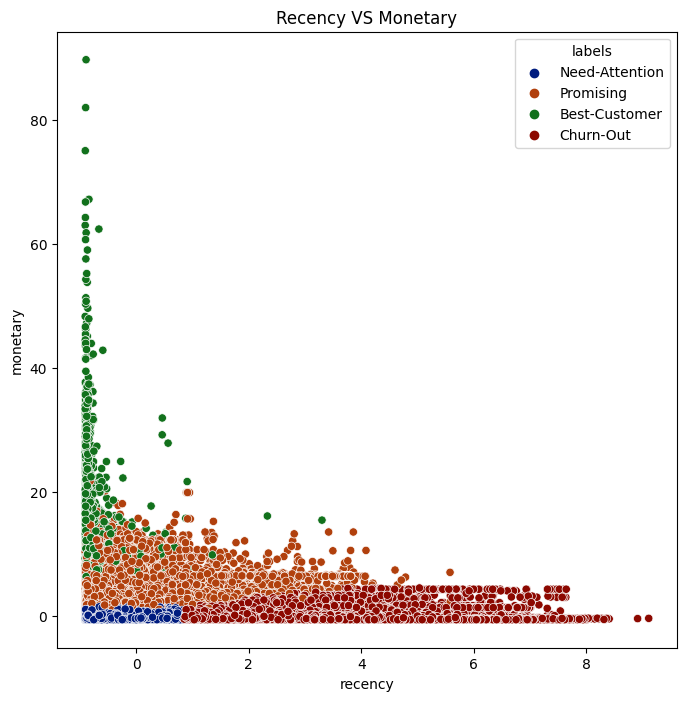

In [29]:
# Recency VS Monetary
plt.figure(figsize=(8,8))
sb.scatterplot(x ='recency',y = 'monetary',data = scaled_df, hue='labels', palette='dark')
plt.title('Recency VS Monetary')
plt.show()